# Dual Information Points Method

In [233]:
mutable struct Var
    #particle
    pxₚ::Array{Float64,2}
    pyₚ::Array{Float64,2}
    Uₚ ::Array{Float64,2}
    Nxₚ::Array{Int32,2}
    Nyₚ::Array{Int32,2}
    
    px ::Array{Float64,2}
    py ::Array{Float64,2}
    U ::Array{Float64,2}
    
    Mrk::Array{Int32,2}
end

In [485]:
function DIP(pxₚ,pyₚ,Nxₚ,Nyₚ,Uₚ,px,py,u,v,U,dt,dx,dy)
    I,J = size(U)
    Uᵢ = U
    Mrk = zeros(Int,I,J)
    uₚ,vₚ = speed(u,v,pxₚ,pyₚ,Nxₚ,Nyₚ,dx,dy)
    uc,vc = speed(u,v,px,py,dx,dy)
 #   @show uₚ
    renew_particle(pxₚ,pyₚ,Nxₚ,Nyₚ,uₚ,vₚ,dt,dx,dy)
    renew_cell(px,py,uc,vc,U,Mrk,dx,dy,dt)
    correct_by_particle(pxₚ,pyₚ,Nxₚ,Nyₚ,Uₚ,px,py,U,Mrk)
    bound!(px,py,U,Mrk)
    blank(px,py,U,Uᵢ,uc,vc,Mrk,dx,dy,dt)
    for i =1:2
    smooth(px, py, U)
    end
end

DIP (generic function with 2 methods)

In [486]:
function solve(T)
    pxₚ,pyₚ,Nxₚ,Nyₚ,Uₚ,px,py,u,v,U,dx,dy= init()
    
    t = 0
    dt = 0.3*dx
    while t ≤ T
        if t+dt > T
            dt = T-t+1e-10
        end
        t += dt
        print("$t \n")
     DIP(pxₚ,pyₚ,Nxₚ,Nyₚ,Uₚ,px,py,u,v,U,dt,dx,dy)
    end
    return px,py,U
end

solve (generic function with 1 method)

In [877]:
px,py,U= solve(π)
           

0.00942477796076938 
0.01884955592153876 
0.02827433388230814 
0.03769911184307752 
0.047123889803846894 
0.05654866776461627 
0.06597344572538565 
0.07539822368615502 
0.0848230016469244 
0.09424777960769377 
0.10367255756846315 
0.11309733552923253 
0.1225221134900019 
0.1319468914507713 
0.14137166941154067 
0.15079644737231004 
0.16022122533307942 
0.1696460032938488 
0.17907078125461817 
0.18849555921538755 
0.19792033717615692 
0.2073451151369263 
0.21676989309769568 
0.22619467105846505 
0.23561944901923443 
0.2450442269800038 
0.2544690049407732 
0.2638937829015426 
0.273318560862312 
0.2827433388230814 
0.2921681167838508 
0.3015928947446202 
0.3110176727053896 
0.320442450666159 
0.3298672286269284 
0.3392920065876978 
0.3487167845484672 
0.3581415625092366 
0.367566340470006 
0.37699111843077543 
0.38641589639154483 
0.39584067435231424 
0.40526545231308364 
0.41469023027385304 
0.42411500823462245 
0.43353978619539185 
0.44296456415616126 
0.45238934211693066 
0.46181412007

([0.0 0.0 … 0.0 0.0; 0.0 0.0825656 … 0.479759 0.0; … ; 0.0 -0.494865 … 0.00127469 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.491838 … 0.00047889 0.0; … ; 0.0 -0.00199319 … -0.496195 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0])

In [763]:
Uᵢ = interface_line(px, py, U)

A = [1 0 0; 0 1 0; 0 1 0]
A = [0 0 0; 0 1 0; 1 0 1]
A = [0 0 1; 0 1 0; 0 1 0]
A = [0 1 0; 0 1 0; 0 1 1]
A = [0 1 0; 0 1 1; 1 0 1]
A = [1 0 1; 1 1 0; 0 1 0]
A = [1 1 0; 0 1 0; 0 1 0]
A = [0 1 0; 0 1 0; 0 1 0]
A = [0 1 0; 0 1 0; 1 0 0]
A = [0 0 1; 0 1 0; 0 1 0]
A = [0 1 0; 0 1 0; 0 1 0]
A = [0 1 0; 0 1 0; 0 1 0]
A = [0 1 0; 0 1 0; 1 0 0]
A = [0 0 1; 0 1 0; 0 1 0]
A = [0 1 0; 0 1 0; 1 1 0]
A = [0 1 0; 1 1 0; 0 0 0]
A = [0 0 1; 0 1 1; 1 0 0]
A = [0 0 1; 0 1 0; 0 1 0]
A = [0 1 0; 0 1 0; 1 0 0]
A = [0 0 1; 0 1 0; 0 1 0]
A = [0 1 0; 0 1 0; 1 0 0]
A = [0 0 1; 1 1 0; 0 0 0]
A = [0 0 0; 1 1 1; 0 0 0]
A = [0 0 0; 0 1 1; 1 0 0]
A = [0 0 1; 1 1 0; 0 0 0]
A = [0 0 0; 1 1 1; 0 0 0]
A = [0 0 0; 0 1 1; 1 0 0]
A = [0 0 1; 0 1 0; 1 0 0]
A = [0 0 1; 0 1 0; 1 0 0]
A = [0 0 1; 0 1 0; 1 0 0]
A = [0 0 1; 1 1 0; 0 0 0]
A = [0 0 0; 1 1 1; 0 0 0]
A = [0 0 0; 1 1 1; 0 0 0]
A = [0 0 0; 0 1 1; 1 0 0]
A = [0 0 1; 1 1 0; 0 0 0]
A = [0 0 0; 1 1 1; 0 0 0]
A = [0 0 0; 1 1 1; 0 0 0]
A = [0 0 0; 1 1 1; 0 0 0]
A = [0 0 0; 

2×200 Array{Int64,2}:
 64  63  62  63  64  65  65  66  67  …  71  71  71  70  69  68  68  67  66
 93  93  92  91  91  91  92  92  92     85  86  87  88  88  88  89  90  90

In [736]:
X = copy(U)
Y = copy(U)
I,J = size(U)
for i in 1:I
    for j in 1:J
X[i, j] = i +  px[i,j]
Y[i, j] = j +  py[i,j]
    end
end



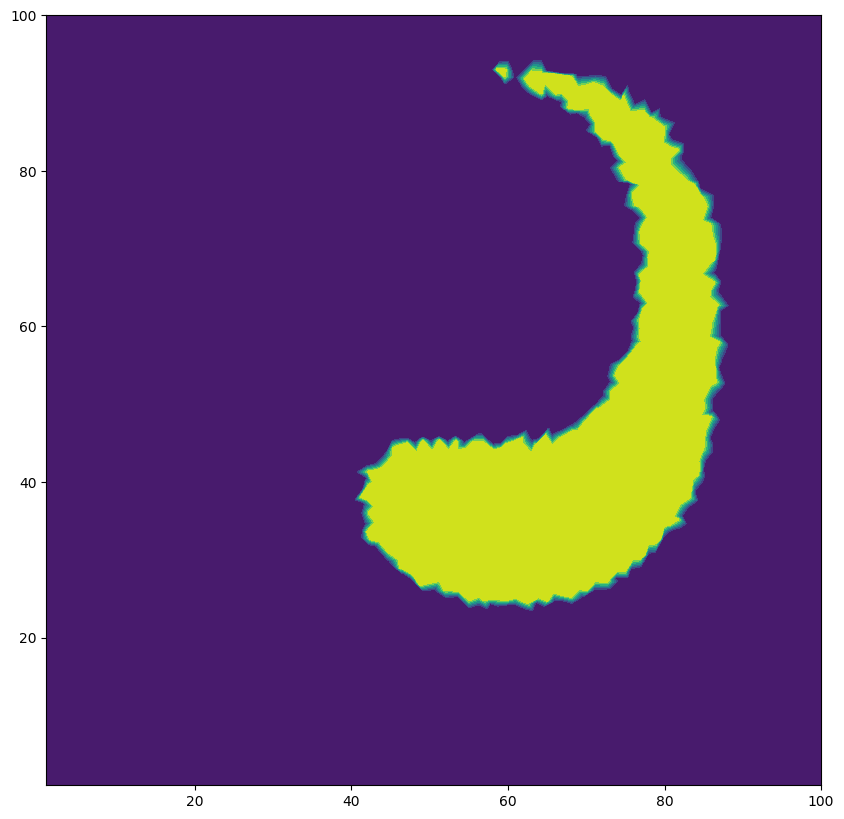

PyObject <matplotlib.contour.QuadContourSet object at 0x7f41fff21d68>

In [737]:
fig, ax1 = plt.subplots(figsize = (10,10))
#plt.xlim(100,200)
#plt.ylim(280,300)
ax1.contourf(X,Y,U)

In [824]:
using  DelimitedFiles
Output(px, py, Ni)

In [677]:
function Output(px,py,U)
   I,J = size(U)
    io = open("data.dat", "w+")
    
    A =zeros(Float64,I*J,3)
    text = " TITLE = \"Dataset\"
VARIABLES = \"x\" \"y\" \"u\"  ZONE T=\"Zone 1\" 
I=$I,J=$J,K=1,ZONETYPE=Ordered 
DATAPACKING=POINT \n "

    write(io,text) 

    for i in 1:I; for j in 1:J
        k = i +J*(j-1)
        A[k,1] = i #+px[i,j]
        A[k,2] = j #+py[i,j]    
        A[k,3] = U[i,j]     
            end;end
    # write(io,A)  
      writedlm(io, A, "  ")
    close(io)
end

Output (generic function with 1 method)

In [640]:
A =zeros(Float64,I*J,3)
for i in 1:I; for j in 1:J
        k = i +J*(j-1)
        A[k,1] = i #+px[i,j]
        A[k,2] = j #+py[i,j]    
        A[k,3] = U[i,j]     
end;end

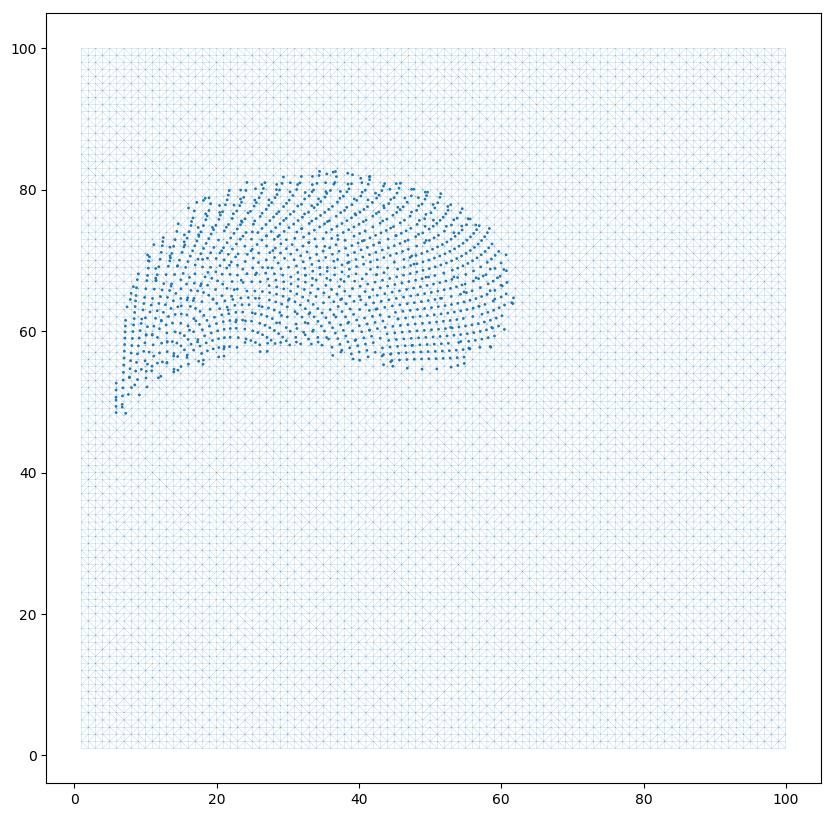

2-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f4200dadcc0>
 PyObject <matplotlib.lines.Line2D object at 0x7f4200dadeb8>

In [504]:
fig, ax1 = plt.subplots(figsize = (10,10))
ax1.scatter(X,Y,U)
ax1.triplot(A[:,1],A[:,2],linewidth =0.1)

In [533]:
function init()
    I = 100
    J = 100
    dx = π/I
    dy = π/J
    r = π/5
    
    xc = π/2
    yc = 0.8
    
    pxₚ=zeros(Float64,I,J)
    pyₚ=zeros(Float64,I,J)
    Nxₚ=zeros(Int32,I,J)
    Nyₚ=zeros(Int32,I,J)
    U = zeros(Float64,I,J)
    Uₚ = zeros(Float64,I,J)
    u = zeros(Float64,I,J)
    v = zeros(Float64,I,J)
    
    px = zeros(Float64,I,J)
    py = zeros(Float64,I,J)
    
    d = zeros(Float64,I,J)
    
    
    for j in 1:J
        for i in 1:I
            Nxₚ[i,j]=i
            Nyₚ[i,j]=j
            d[i,j] = distance(dx*i,dy*j,xc,yc)
        end
    end
    for j in 1:J
        for i in 1:I
            if d[i,j]<r
                 U[i,j] = 1
            else
                U[i,j] = 0
            end
        end
    end
    for j in 2:J-1
        for i in 2:I-1
            if d[i,j]>r
               pxt,pyt = initp(r,xc,yc,i*dx,j*dy,dx,dy)
                if (-0.5< pxt < 0.5) && (-0.5< pyt < 0.5)
                    px[i,j] = pxt
                    py[i,j] = pyt
                    U[i,j] = 1
                end
            end
            if d[i,j]<r
               pxt,pyt = initp(r,xc,yc,i*dx,j*dy,dx,dy)
                if (-0.5< pxt < 0.5) &&(-0.5< pyt < 0.5)
                    px[i,j] = pxt
                    py[i,j] = pyt
                end
            end
        end
    end
    
     for j in 1:J
        for i in 1:I
            Nxₚ[i,j]=i
            Nyₚ[i,j]=j
            d[i,j] = distance(dx*(i+px[i,j]),dy*(j+py[i,j]),xc,yc)
        end
    end
    for j in 1:J
        for i in 1:I
            if d[i,j]<r
                 U[i,j] = 1
            else
                U[i,j] = 0
            end
        end
    end
    
    Uₚ = copy(U)  
    pxₚ= copy(px)
    pyₚ= copy(py)
    return pxₚ,pyₚ,Nxₚ,Nyₚ,Uₚ,px,py,u,v,U,dx,dy
end
    
    
    

init (generic function with 1 method)

In [460]:
pxₚ,pyₚ,Nxₚ,Nyₚ,Uₚ,px,py,u,v,U,dx,dy= init()

([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], Int32[1 1 … 1 1; 2 2 … 2 2; … ; 49 49 … 49 49; 50 50 … 50 50], Int32[1 2 … 49 50; 1 2 … 49 50; … ; 1 2 … 49 50; 1 2 … 49 50], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], 0.06283185307179587, 0.06283185307179587)

In [310]:
function initp(r,xc,yc,xo,yo,dx,dy)
    x = r*(xo-xc)/√((yc-yo)^2+(xc-xo)^2)+xc
    y = r*(yo-yc)/√((yc-yo)^2+(xc-xo)^2)+yc
    
    px = (x-xo)/dx
    py =  (y-yo)/dy
    return px,py
end

initp (generic function with 1 method)

In [243]:
function distance(x1,y1,x2,y2)
    return √((x1-x2)^2+(y1-y2)^2)
end

distance (generic function with 1 method)

In [244]:
function speed(u,v,pxₚ,pyₚ,Nxₚ,Nyₚ,dx,dy)
    I,J = size(u)
    uₚ = ones(Float64,I,J)
    vₚ = ones(Float64,I,J)
  #  return uₚ,vₚ
    for j in 1:J
        for i in 1:I
            x = Nxₚ[i,j]*dx +pxₚ[i,j]*dx
            y=  Nyₚ[i,j]*dy +pyₚ[i,j]*dy
            uₚ[i,j] = cos(x-π/2)*sin(y-π/2)
            vₚ[i,j] = -sin(x-π/2)*cos(y-π/2)
        end
    end
    return uₚ,vₚ
end
    

speed (generic function with 2 methods)

In [245]:
function speed(u,v,pxₚ,pyₚ,dx,dy)
    I,J = size(u)
    uₚ = ones(Float64,I,J)
    vₚ = ones(Float64,I,J)
  #  return uₚ,vₚ
    for j in 1:J
        for i in 1:I
            x = i*dx +pxₚ[i,j]*dx
            y =  j*dy +pyₚ[i,j]*dy
            uₚ[i,j] = cos(x-π/2)*sin(y-π/2)
            vₚ[i,j] = -sin(x-π/2)*cos(y-π/2)
        end
    end
    return uₚ,vₚ
end
    

speed (generic function with 2 methods)

In [246]:
uc

200×200 Array{Float64,2}:
 -0.454649    0.350175    0.83305    …   0.838802    0.396859   -0.409954 
 -0.491295    0.378401    0.900198       0.906414    0.428848   -0.442998 
 -0.0762475   0.0587266   0.139708       0.140672    0.0665558  -0.0687519
  0.408902   -0.314941   -0.749229      -0.754402   -0.356928    0.368705 
  0.518109   -0.399053   -0.949328      -0.955883   -0.452253    0.467176 
  0.150969   -0.116278   -0.276619   …  -0.278529   -0.13178     0.136128 
 -0.354971    0.273403    0.650412       0.654903    0.309852   -0.320076 
 -0.534553    0.411718    0.979457       0.986221    0.466607   -0.482003 
 -0.222669    0.171502    0.407994       0.410811    0.194366   -0.200779 
  0.293936   -0.226393   -0.538577      -0.542296   -0.256574    0.26504  
  0.540297   -0.416143   -0.989983   …  -0.996819   -0.471621    0.487183 
  0.289912   -0.223293   -0.531203      -0.534871   -0.253062    0.261412 
 -0.227017    0.174851    0.415962       0.418835    0.198162   -0.2047   

In [479]:
function blank(px,py,U,Uᵢ,uc,vc,Mrk,dx,dy,dt)
    I,J = size(U)
    for i in 1:I
        for j in 1:J
            if Mrk[i,j] == 0
                q = -uc[i,j]*dt/dx
                ix = i+ifloor(q+0.5)
                q = -vc[i,j]*dt/dy
                iy = j + ifloor(q+0.5)
                U[i,j] =  Uᵢ[ix,iy]
            end
        end
    end
end

blank (generic function with 1 method)

In [894]:
function interface_line(px,py,U)
    I,J = size(U)
    Ninterface = 0
    mark_line = zeros(Int,I,J)
    Uᵢ = zeros(Float64,I,J)
    Ix =0;Iy=0
    for j in 2:J-1;for i in 2:I-1;if U[i,j] ==1
        a₁ = U[i,j] != U[i+1,j]
        a₂ = U[i,j] != U[i-1,j]
        a₃ = U[i,j] != U[i,j+1]
        a₄ = U[i,j] != U[i,j-1]
        if (a₁+a₂+a₃+a₄) >0        
            mark_line[i,j] = 1
            Ninterface += 1
            Ix = i;Iy = j
        end
        
    end;end;end
    mark_linet=copy(mark_line)
    for j in 2:J-1;for i in 2:I-1; if mark_line[i,j]==1
    
        A = copy(mark_line[i-1:i+1,j-1:j+1])

        
            if sum(A) > 3 
            U[i,j] =0
            mark_linet[i,j] = 0
            Ninterface -= 1
            for i1 in 1:3;for j1 in 1:3; if A[i1,j1] == 1
                A1 = copy(mark_line[i-3+i1:i+i1-1,j+j1-3:j+j1-1])
                if sum(A1) ≤ 3
                    U[i,j] =1
                    mark_linet[i,j] = 1
                    Ninterface += 1
                    break
                end
            end;end;end
        end
    end;end;end
    mark_line = mark_linet
    for j in 2:J-1;for i in 2:I-1; if mark_line[i,j]==1
    
        A = copy(mark_line[i-1:i+1,j-1:j+1])
        if sum(A) == 1
            U[i,j] =0
            mark_line[i,j] = 0
            Ninterface -= 1
        end
    end;end;end
    
    Ni = zeros(Int,2,Ninterface)
    
    @show Ninterface
  #  @show Ninterface
    # 1 N,2 ix, 3 iy
    Ni[1,1]= Ix
    Ni[2,1] =Iy
 #   @show Ix,Iy
    A = copy(mark_line[Ix-1:Ix+1,Iy-1:Iy+1])
    i,j = plus_inter(A,0,0)
    Ni[1,2] = (i-2)+Ix;Ni[2,2] = (j-2)+Iy
  #  @show Ni[:,2]
    for i in 2:Ninterface-1
        ix = Ni[1,i];iy= Ni[2,i]
        A = copy(mark_line[ix-1:ix+1,iy-1:iy+1])
       @show A
        if i == 2
            a,b = plus_inter(A,Ni[1,i-1]-ix+2,Ni[2,i-1]-iy+2,0,0)
        else
        a,b = plus_inter(A,Ni[1,i-1]-ix+2,Ni[2,i-1]-iy+2,Ni[1,i-2]-ix+2,Ni[2,i-2]-iy+2)
        end
        Ni[1,i+1] = a-2+ix; Ni[2,i+1]= b+ iy-2
#         if Ni[1,i+1] == Ni[1,1] && Ni[2,i+1] == Ni[2,1]
#             Ninterface = i
#             break
#         end
    end
    # @show Ninterface
    return Ni#[:,1:Ninterface]
end

interface_line (generic function with 1 method)

In [895]:
Ni = interface_line(px, py, U)

Ninterface = 153
A = [0 1 0; 0 1 0; 0 1 0]
A = [0 1 0; 0 1 0; 0 1 0]
A = [0 1 0; 0 1 0; 0 1 0]
A = [0 1 0; 0 1 0; 0 1 0]
A = [0 1 0; 0 1 0; 0 1 0]
A = [0 1 0; 0 1 0; 0 1 0]
A = [0 1 0; 0 1 0; 0 1 0]
A = [0 1 0; 0 1 0; 0 1 0]
A = [0 1 0; 0 1 0; 0 1 0]
A = [1 0 0; 0 1 0; 0 1 0]
A = [0 1 0; 0 1 0; 0 0 1]
A = [0 1 0; 0 1 0; 0 1 0]
A = [0 1 0; 0 1 0; 0 1 0]
A = [0 1 0; 0 1 0; 0 1 0]
A = [1 0 0; 0 1 0; 0 1 0]
A = [0 1 0; 0 1 0; 0 0 1]
A = [0 1 0; 0 1 0; 0 1 0]
A = [1 0 0; 0 1 0; 0 1 0]
A = [0 1 0; 0 1 0; 0 0 1]
A = [0 1 0; 0 1 0; 0 1 0]
A = [1 0 0; 0 1 0; 0 1 0]
A = [0 1 0; 0 1 0; 0 0 1]
A = [0 1 0; 0 1 0; 0 1 0]
A = [0 1 0; 0 1 0; 0 1 0]
A = [1 0 0; 0 1 0; 0 1 0]
A = [0 0 0; 1 1 0; 0 0 1]
A = [1 0 0; 0 1 1; 0 0 0]
A = [1 0 0; 0 1 0; 0 0 1]
A = [1 0 0; 0 1 0; 0 0 1]
A = [0 1 0; 0 1 0; 0 0 1]
A = [1 0 0; 0 1 0; 0 1 0]
A = [1 0 0; 0 1 0; 0 0 1]
A = [0 0 0; 1 1 0; 0 0 1]
A = [0 0 0; 1 1 1; 0 0 0]
A = [1 0 0; 0 1 1; 0 0 0]
A = [0 0 0; 1 1 0; 0 0 1]
A = [1 0 0; 0 1 1; 0 0 0]
A = [0 0 0; 1 1 0; 0 

2×153 Array{Int64,2}:
 42  41  40  39  38  37  36  35  34  …  41  40  39  38  37  36  35  34  33
 82  82  82  82  82  82  82  82  82     82  82  82  82  82  82  82  82  82

In [843]:
Ni

2×212 Array{Int64,2}:
 64  63  62  63  64  65  65  66  67  68  …  63  62  63  64  0  0  0  0  0  0
 93  93  92  91  91  91  92  92  92  92     91  92  93  93  0  0  0  0  0  0

In [896]:
px,py, Ni = smooth_line(Ni, px, py, dx, dy)

I = 153
Xnew = [35.3762, 34.3844, 33.2118, 41.5505, 40.9752, 40.2144, 39.2255, 38.2068, 37.1979, 36.2994, 35.3762, 34.3844, 33.2118, 32.1345, 31.1538, 30.2984, 29.2754, 28.0966, 26.9934, 25.9926, 25.1187, 24.1234, 23.1305, 22.1395, 21.1928, 20.2711, 19.2696, 18.198, 17.1346, 16.3116, 15.6531, 14.9162, 14.0559, 13.0174, 12.1732, 11.2303, 10.3095, 10.2121, 9.92077, 9.37151, 8.85255, 8.39445, 8.07198, 7.7482, 7.48661, 7.29535, 7.20866, 7.15791, 7.12321, 7.08533, 7.0449, 7.00256, 6.85121, 6.59534, 6.23921, 6.09945, 6.26898, 6.74394, 7.85884, 8.98722, 10.0499, 11.0323, 11.9704, 12.9145, 13.7901, 14.5717, 15.8301, 16.9832, 18.0313, 19.0909, 20.0942, 21.0412, 21.4148, 22.0362, 22.9778, 24.0768, 25.1529, 26.1338, 27.1633, 28.1523, 29.1547, 30.1495, 31.1323, 32.1217, 33.1306, 34.135, 35.1539, 36.154, 37.1402, 38.0666, 39.0911, 40.107, 41.1778, 42.1897, 43.1844, 44.1005, 44.918, 45.7901, 46.737, 47.7737, 48.8017, 49.8205, 50.8445, 51.8704, 52.891, 53.8714, 54.8179, 55.2264, 55.96, 56.9372, 57.89

([0.0 0.0 … 0.0 0.0; 0.0 0.0825656 … 0.479759 0.0; … ; 0.0 -0.494865 … 0.00127469 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.491838 … 0.00047889 0.0; … ; 0.0 -0.00199319 … -0.496195 0.0; 0.0 0.0 … 0.0 0.0], [39 41 … 34 36; 55 82 … 82 55])

In [899]:
function smooth_line(Ni,px,py,dx,dy)
    none,I = size(Ni)
    @show I
    X = zeros(Float64,I+6)
    Y = zeros(Float64,I+6)
    
    for i in 1:I
        X[i+3] = (Ni[1,i]+px[Ni[1,i],Ni[2,i]])
        Y[i+3] = (Ni[2,i]+py[Ni[1,i],Ni[2,i]])
    end
    for i in 1:3
        X[i] = X[I+i-1]
        X[I+i+3] = X[i+3-1]
    end
    
    #Detect smooth 
   # angle_gradient = zeros(Float64,I)
   
    Xnew = copy(X)
    Ynew = copy(Y)
    @show Xnew
    for i in 1:I
        Xnew[i] =1/3*(X[i-1+3] + X[i+3]+ X[i+1+3])
        Ynew[i] =1/3*(Y[i-1+3] + Y[i+3]+ Y[i+1+3])
        Ni[1,i] = ifloor(Xnew[i] +0.5)
        Ni[2,i] = ifloor(Ynew[i] +0.5)
        px[Ni[1,i],Ni[2,i]] = Xnew[i] - Ni[1,i]
        py[Ni[1,i],Ni[2,i]] = Ynew[i] - Ni[2,i]
    end
    return px,py, Ni
end
    
    

smooth_line (generic function with 1 method)

In [653]:
for j = 1:3
for i in 1:3
    if i == 2
        break
    end
    print(i)

end
    print(j)
end

111213

In [890]:
px,py, Ni = smooth_line(Ni, px, py, dx, dy)

I = 143
Xnew = [44.9034, 44.1138, 43.4602, 41.5505, 41.0943, 40.2809, 39.2681, 38.1275, 37.2247, 36.2415, 35.432, 34.4552, 33.266, 31.9142, 31.2232, 30.324, 29.3478, 28.1544, 26.7875, 26.0384, 25.1521, 24.1656, 23.0525, 22.1733, 21.1928, 20.3652, 19.2552, 18.1883, 17.1506, 16.065, 15.7192, 15.1749, 13.8546, 13.1382, 12.0595, 11.3219, 10.3095, 10.3792, 9.94747, 9.43561, 8.73145, 8.3906, 8.06131, 7.76404, 7.41925, 7.27654, 7.19027, 7.15917, 7.12427, 7.08618, 7.04553, 7.00297, 6.95916, 6.59151, 6.23534, 5.89078, 6.17221, 6.74394, 7.8348, 8.99777, 10.1291, 11.0229, 11.945, 12.9432, 13.8554, 14.5717, 15.8722, 17.0463, 18.0313, 19.1295, 20.1119, 21.0412, 21.2953, 21.908, 22.9054, 24.12, 25.2049, 26.1338, 27.1633, 28.1218, 29.1718, 30.1707, 31.1061, 32.12, 33.1391, 34.1328, 35.1332, 36.1957, 37.1331, 38.0918, 38.975, 40.2064, 41.1395, 42.1875, 43.2422, 44.1234, 44.9361, 45.6945, 46.7398, 47.7767, 48.8047, 49.8236, 50.8331, 51.8768, 52.9012, 53.895, 54.8179, 55.0663, 55.7949, 57.0187, 57.998, 

([0.0 0.0 … 0.0 0.0; 0.0 0.0825656 … 0.479759 0.0; … ; 0.0 -0.494865 … 0.00127469 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.491838 … 0.00047889 0.0; … ; 0.0 -0.00199319 … -0.496195 0.0; 0.0 0.0 … 0.0 0.0], [42 41 … 44 43; 55 82 … 81 54])

In [884]:
Ni = interface_line(px, py, U)

Ninterface = 153
A = [0 1 0; 0 1 0; 0 1 0]
A = [0 1 0; 0 1 0; 0 1 0]
A = [0 1 0; 0 1 0; 0 1 0]
A = [0 1 0; 0 1 0; 0 1 0]
A = [0 1 0; 0 1 0; 0 1 0]
A = [0 1 0; 0 1 0; 0 1 0]
A = [0 1 0; 0 1 0; 0 1 0]
A = [0 1 0; 0 1 0; 0 1 0]
A = [0 1 0; 0 1 0; 0 1 0]
A = [1 0 0; 0 1 0; 0 1 0]
A = [0 1 0; 0 1 0; 0 0 1]
A = [0 1 0; 0 1 0; 0 1 0]
A = [0 1 0; 0 1 0; 0 1 0]
A = [0 1 0; 0 1 0; 0 1 0]
A = [1 0 0; 0 1 0; 0 1 0]
A = [0 1 0; 0 1 0; 0 0 1]
A = [0 1 0; 0 1 0; 0 1 0]
A = [1 0 0; 0 1 0; 0 1 0]
A = [0 1 0; 0 1 0; 0 0 1]
A = [0 1 0; 0 1 0; 0 1 0]
A = [1 0 0; 0 1 0; 0 1 0]
A = [0 1 0; 0 1 0; 0 0 1]
A = [0 1 0; 0 1 0; 0 1 0]
A = [0 1 0; 0 1 0; 0 1 0]
A = [1 0 0; 0 1 0; 0 1 0]
A = [0 0 0; 1 1 0; 0 0 1]
A = [1 0 0; 0 1 1; 0 0 0]
A = [1 0 0; 0 1 0; 0 0 1]
A = [1 0 0; 0 1 0; 0 0 1]
A = [0 1 0; 0 1 0; 0 0 1]
A = [1 0 0; 0 1 0; 0 1 0]
A = [1 0 0; 0 1 0; 0 0 1]
A = [0 0 0; 1 1 0; 0 0 1]
A = [0 0 0; 1 1 1; 0 0 0]
A = [1 0 0; 0 1 1; 0 0 0]
A = [0 0 0; 1 1 0; 0 0 1]
A = [1 0 0; 0 1 1; 0 0 0]
A = [0 0 0; 1 1 0; 0 

2×143 Array{Int64,2}:
 42  41  40  39  38  37  36  35  34  …  51  50  49  48  47  46  45  44  43
 82  82  82  82  82  82  82  82  82     79  80  80  80  80  81  81  81  81

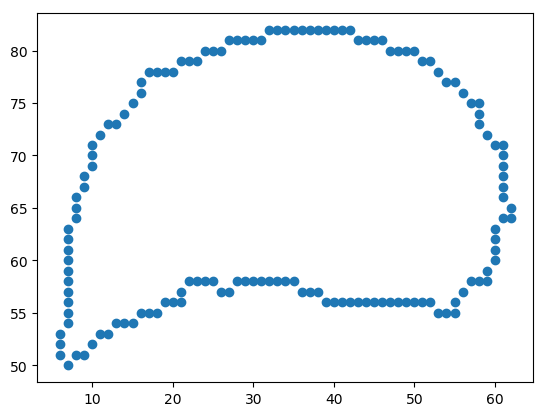

PyObject <matplotlib.collections.PathCollection object at 0x7f41ff377470>

In [886]:
scatter(Ni[1,:],Ni[2,:])

In [887]:
none,I = size(Ni)

(2, 143)

In [897]:
A= zeros(Float64,I)
B= zeros(Float64,I)
for i in 1:I
    A[i] = Ni[1,i] +px[Ni[1,i],Ni[2,i]]
    B[i] = Ni[2,i] +py[Ni[1,i],Ni[2,i]]
end

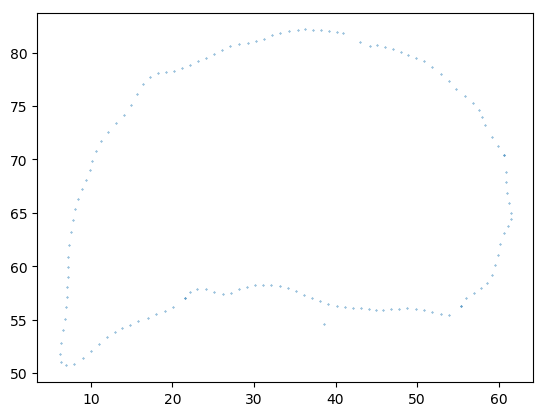

PyObject <matplotlib.collections.PathCollection object at 0x7f41fef7c8d0>

In [898]:
scatter(A,B,marker = "o",s=0.1)

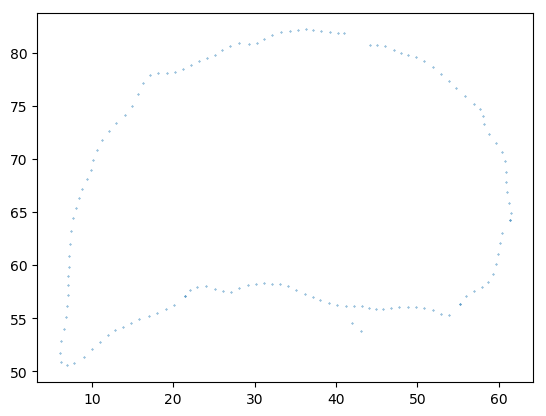

PyObject <matplotlib.collections.PathCollection object at 0x7f41ff371f60>

In [893]:
scatter(A,B,marker = "o",s=0.1)

In [856]:
? scatter

search: scatter scatter3D



A scatter plot of *y* vs *x* with varying marker size and/or color.

Parameters
----------
x, y : array_like, shape (n, )
    The data positions.

s : scalar or array_like, shape (n, ), optional
    The marker size in points**2.
    Default is ``rcParams['lines.markersize'] ** 2``.

c : color, sequence, or sequence of color, optional
    The marker color. Possible values:

    - A single color format string.
    - A sequence of color specifications of length n.
    - A sequence of n numbers to be mapped to colors using *cmap* and
      *norm*.
    - A 2-D array in which the rows are RGB or RGBA.

    Note that *c* should not be a single numeric RGB or RGBA sequence
    because that is indistinguishable from an array of values to be
    colormapped. If you want to specify the same RGB or RGBA value for
    all points, use a 2-D array with a single row.  Otherwise, value-
    matching will have precedence in case of a size matching with *x*
    and *y*.

    Defaults to ``None``. In that

┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = show(::IOContext{Base.GenericIOBuffer{Array{UInt8,1}}}, ::MIME{Symbol("text/plain")}, ::PyPlot.LazyHelp) at PyPlot.jl:27
└ @ PyPlot /home/bfly/.juliapro/JuliaPro_v1.1.1.1/packages/PyPlot/4wzW1/src/PyPlot.jl:27


In [830]:
Ni

100×100 Array{Int64,2}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  

In [829]:
io = open("data2.dat", "w+")
writedlm(io,transpose(Ni),"  ")

In [851]:
function plus_inter(mrk,I,J,I1,J1) 
    for (i,j) in [ (1,2) (3,2) (2,1) (2,3) (1,1) (1,3) (3,1) (3,3) ]
        if mrk[i,j] == 1 && (i,j) != (I,J) && (i,j) != (I1,J1)
            return i,j
            break
        end
    end
end            

plus_inter (generic function with 3 methods)

In [643]:
function model_delete(A)
    if sum(A) == 2
        return 0,0,1
    elseif sum(A) == 4
        for (i,j) in [(-1,1) (1,-1) (1,1) (-1,-1)]
            if A[2+i,2] + A[2+i,2+j] +A[2,2+j] == 3
            return i,j,3
            break
                end;end
    else
        return 0,0,0
    end
end


model_delete (generic function with 1 method)

In [588]:
mrk = zeros(Int,3,3)
mrk[1,1] = 1
mrk[1,3] =1
mrk[3,2] =1
plus_inter(mrk,1,1)

(3, 2)

In [739]:
function smooth(px,py,U)
    I,J = size(U)
    for j in 2:J-1;for i in 2:I-1 
        n = 0
       if U[i+1,j] == U[i,j] && (U[i+1,j+1]== U[i,j] || U[i+1,j-1]== U[i,j])
           n += 1
        end
       if U[i-1,j] == U[i,j] && (U[i-1,j-1]== U[i,j] || U[i-1,j+1]== U[i,j])
           n += 1
        end
       if U[i,j-1] == U[i,j] && (U[i+1,j-1]== U[i,j] || U[i-1,j-1]== U[i,j])
           n += 1
        end
        if U[i,j+1] == U[i,j] && (U[i+1,j+1]== U[i,j] || U[i-1,j+1]== U[i,j])
           n += 1
        end
        
        if n == 0  || n == 1
            if U[i,j] == 1
                U[i,j] =0
                px[i,j]=0
                py[i,j]=0
            else
                U[i,j] =1
                px[i,j]=0
                py[i,j]=0
            end
        end
    end;end
end            
            

smooth (generic function with 1 method)

In [250]:
function bound!(px,py,U,Mrk)
    I,J = size(U)
    for i in 1:I
       for  j = [1,J] 
        Mrk[i,j] = 1
        U[i,j] = 0
        px[i,j] =0
        py[i,j] = 0
        end
    end
    for j in 1:J
       for  i = [1,I] 
        Mrk[i,j] = 1
        U[i,j] = 0
        px[i,j] =0
        py[i,j] = 0
        end
    end
end


bound! (generic function with 1 method)

In [251]:
function correct_by_particle(pxₚ,pyₚ,Nxₚ,Nyₚ,Uₚ,px,py,U,Mrk)
    I,J = size(Uₚ)
    Mrk₀ = zeros(Int,I,J)
    for i in 1:I
        for j in 1:J
            ix = Nxₚ[i,j];iy = Nyₚ[i,j]
            if 1≤ix ≤I && 1≤iy ≤ J 
                if Mrk₀[ix,iy] == 1
                    if U[ix,iy] == Uₚ[i,j]
                        px[ix,iy] = 1/2*(px[ix,iy]+pxₚ[i,j])
                        py[ix,iy] = 1/2*(py[ix,iy]+pyₚ[i,j])
                    elseif U[ix,iy] < Uₚ[i,j]
                        px[ix,iy] = pxₚ[i,j]
                        py[ix,iy] = pyₚ[i,j]
                        U[ix,iy] = Uₚ[i,j]
                    end
                elseif Mrk₀[ix,iy] ==0
                    px[ix,iy] = pxₚ[i,j]
                    py[ix,iy] = pyₚ[i,j]
                    U[ix,iy] = Uₚ[i,j]
                    Mrk₀[ix,iy] = 1
                    Mrk[ix,iy] =1
                end
            end
        end
    end
   # return px,py,U
end

correct_by_particle (generic function with 1 method)

In [252]:
function renew_cell(px,py,uc,vc,U,Mrk,dx,dy,dt)
    I,J = size(U)
    Uᵢ = copy(U)
    pxᵢ = copy(px)
    pyᵢ = copy(py)
    for i in 1:I
        for j in 1:J
            q = px[i,j] + uc[i,j]*dt/dx
            ix = i+ifloor(q+0.5)
            q1= py[i,j] +vc[i,j]*dt/dy
            iy = j+ifloor(q1+0.5)
            
            if  1≤ix ≤I && 1≤iy ≤ J 
                if Mrk[ix,iy] == 1 
                    if Uᵢ[ix,iy] == U[i,j]
                        pxᵢ[ix,iy] = 1/2*(pxᵢ[ix,iy] + q-floor(q+0.5))
                        pyᵢ[ix,iy] = 1/2*(pyᵢ[ix,iy] + q1-floor(q1+0.5))
                    elseif Uᵢ[ix,iy] < U[i,j]
                        Uᵢ[ix,iy] = U[i,j]
                        pxᵢ[ix,iy] =  q-ifloor(q+0.5)
                        pyᵢ[ix,iy] = q1 -ifloor(q+0.5)
                    end
                elseif Mrk[ix,iy] == 0 
                    Uᵢ[ix,iy] = U[i,j]
                    pxᵢ[ix,iy] =  q-ifloor(q+0.5)
                    pyᵢ[ix,iy] = q1 -ifloor(q+0.5)
                    Mrk[ix,iy] = 1
                end
            end
                    
        end
    end
    px = pxᵢ
    py = pyᵢ
    U = Uᵢ
end

renew_cell (generic function with 3 methods)

In [116]:
function renew_particle(pxₚ,pyₚ,Nxₚ,Nyₚ,uₚ,vₚ,dt,dx,dy)
    I,J = size(uₚ)
    for i in 1:I
        for j in 1:J
            q = pxₚ[i,j] + uₚ[i,j]*dt/dx
            Nxₚ[i,j] += ifloor(q+0.5)
            pxₚ[i,j] = q-ifloor(q+0.5)
            
            q = pyₚ[i,j]+vₚ[i,j]*dt/dy
            Nyₚ[i,j] += ifloor(q+0.5)
            pyₚ[i,j] = q-ifloor(q+0.5)
        end
    end
 #   return pxₚ,pyₚ,Nxₚ,Nyₚ
end

renew_particle (generic function with 1 method)

In [39]:
ifloor(x) = Int(floor(x))
    

ifloor (generic function with 1 method)

In [40]:
ifloor(3.2)

3